In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [5]:
# Monod equation is the same as michaelis Menten but just mew (u) is the growth rate

In [14]:
def monod_simulation1(t, x, s, vmax, km):
    mu = vmax * s / (km + s)
    dxdt = mu * x
    
    return dxdt

  # specific growth rate
X0 = 0.1
s = 0.5
km = 0.1
vmax = 0.8  # initial biomass concentration
t_span = (0, 10)  # time span for the integration
 

solution = solve_ivp(monod_simulation1, t_span, [X0], args=(s, vmax, km))

    
t = solution.t
X = solution.y[0]


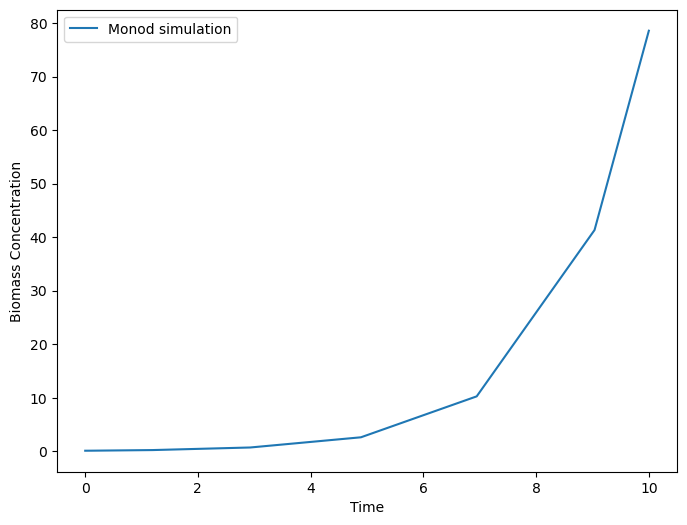

In [15]:

plt.figure(figsize=(8, 6))
plt.plot(t, X, label='Monod simulation')
plt.xlabel('Time')
plt.ylabel('Biomass Concentration')
plt.legend()
plt.show()

In [8]:
######## Monod simulation with substrate decay ########
# WE also now need to take into account the 

In [16]:

def monod_simulation2(t, y, vmax, km, y_coeff, ):
    x, s = y
    mu = vmax * s / (km + s)
    dxdt = mu * x
    dsdt = -1/y_coeff * (mu * x)
    return (dxdt, dsdt)

  # specific growth rate
X0 = 0.1
S0 = 50
km = 0.5
y_coeff = 0.4
vmax = 0.8
t_span = (0, 10)  # time span for the integration
 

solution = solve_ivp(monod_simulation2, t_span, [X0, S0], args=(vmax, km, y_coeff))

    
t = solution.t
X = solution.y[0]
S = solution.y[1]


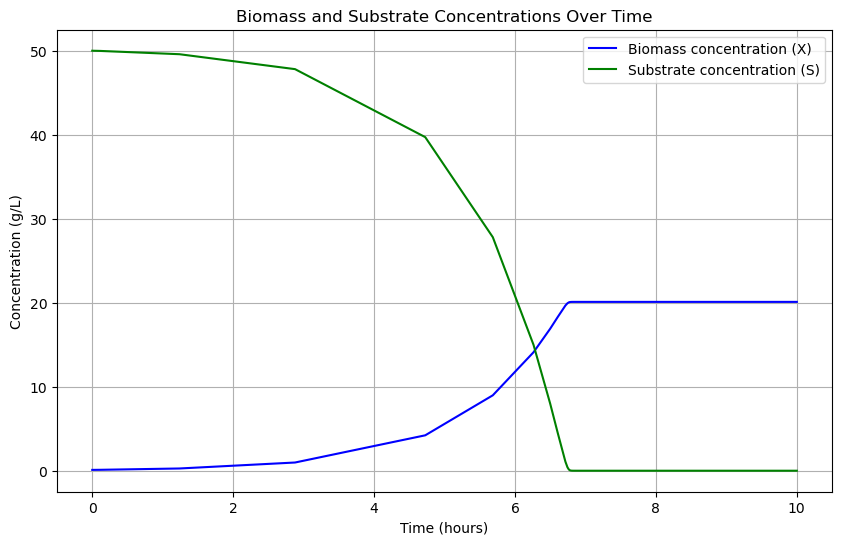

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='Biomass concentration (X)', color='b')
plt.plot(t, S, label='Substrate concentration (S)', color='g')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/L)')
plt.legend()
plt.title('Biomass and Substrate Concentrations Over Time')
plt.grid(True)
plt.show()

In [11]:
######## Monod simulation with cell death ########
# need to factor in the decrease after the substrate conc reaches zero.

In [5]:

def monod_simulation3(t, y, vmax, km, y_coeff, m):
    x, s = y
    mu = vmax * s / (km + s)
    dxdt = mu * x - (m * x)
    dsdt = -1 / y_coeff * (mu * x)
    return [dxdt, dsdt]

# Parameters
X0 = 0.5  
S0 = 20  
km = 0.5 
y_coeff = 0.5  
vmax = 0.8  
m = 0.1 
t_span = (0, 20) 
t_eval = np.linspace(0, 20, 20)  
# t_evalarray_like or None, optional
# Times at which to store the computed solution, must be sorted and lie within t_span. If None (default), use points selected by the solver.
# altering THe intervals for t_eval effectively alters the smoothness of the line.....
solution = solve_ivp(monod_simulation3, t_span, [X0, S0], args=(vmax, km, y_coeff, m), t_eval=t_eval)


t = solution.t
X = solution.y[0]
S = solution.y[1]

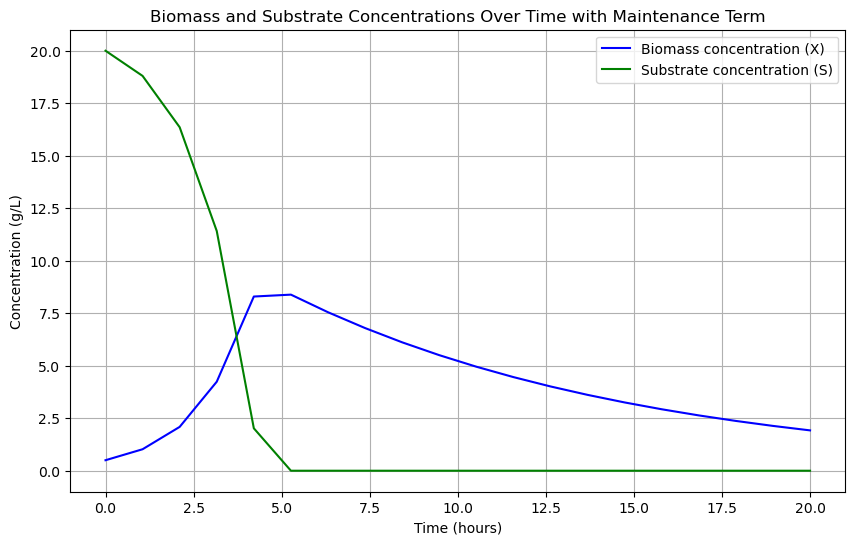

In [6]:
# Plot biomass and substrate concentrations
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='Biomass concentration (X)', color='b')
plt.plot(t, S, label='Substrate concentration (S)', color='g')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/L)')
plt.legend()
plt.title('Biomass and Substrate Concentrations Over Time with Maintenance Term')
plt.grid(True)
plt.show()

In [ ]:
## Lets look at differnt types of substrate consumption ##

In [ ]:
## one example is when an orgism requires two essential "substrates" to survive e.g. oxygen and glucose for humans at a very basic level.
# There can't be growth without those two so how do we implement them both and especially make sure that when one runs out cell growth stops.
# its pretty easy we just incorparate the substrate into the monod equation.

In [46]:
def monod_simulation4(t, y, vmax, ksa, ksb, ya_coeff, yb_coeff, m):
    x, sa, sb = y
    mu = vmax * (sa / (ksa + sa)) * (sb / (ksb + sb))
    dxdt = mu * x - (m * x)
    dsadt = -1 / ya_coeff * (mu * x)
    dsbdt = -1 / yb_coeff * (mu * x)
    return [dxdt, dsadt, dsbdt]

# Parameters
X0 = 0.5  
Sa0 = 20
Sb0 = 20
ksa = 0.5
ksb = 0.5
ya_coeff = 0.5
yb_coeff = 1.2
vmax = 0.8  
m = 0.1 
t_span = (0, 20) 
t_eval = np.linspace(0, 20, 20)  
# t_evalarray_like or None, optional
# Times at which to store the computed solution, must be sorted and lie within t_span. If None (default), use points selected by the solver.
# altering THe intervals for t_eval effectively alters the smoothness of the line.....
solution = solve_ivp(monod_simulation4, t_span, [X0, Sa0, Sb0], args=(vmax, ksa, ksb, ya_coeff, yb_coeff, m), t_eval=t_eval)


t = solution.t
X = solution.y[0]
Sa = solution.y[1]
Sb = solution.y[2]

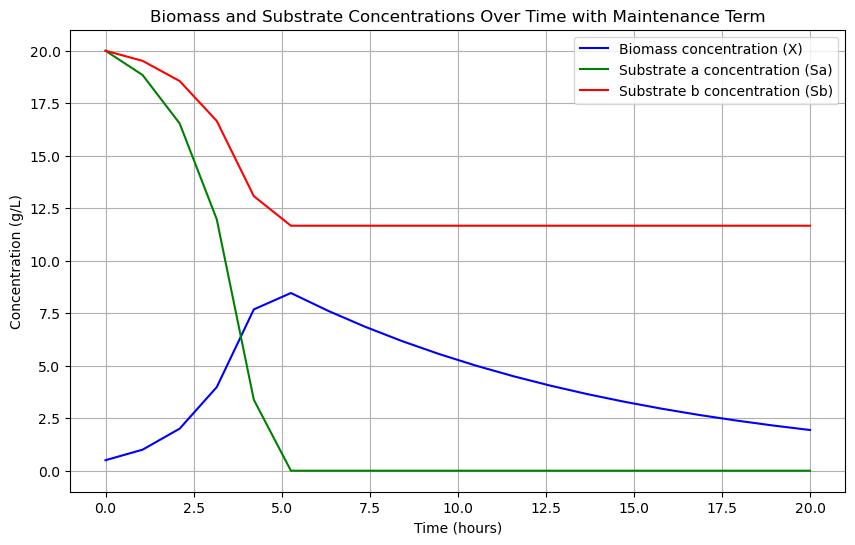

In [47]:
# Plot biomass and substrate concentrations
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='Biomass concentration (X)', color='b')
plt.plot(t, Sa, label='Substrate a concentration (Sa)', color='g')
plt.plot(t, Sb, label='Substrate b concentration (Sb)', color='r')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/L)')
plt.legend()
plt.title('Biomass and Substrate Concentrations Over Time with Maintenance Term')
plt.grid(True)
plt.show()

In [ ]:
#### Here the growth stops when just one of the essential substrates becomes zero ####

In [ ]:
##### Next lets do diauxic growth. #####
## Diauxic can be thought of as a switch of substrate when one runs out. e.g. in E.coli when glucose runs out organism switches
# to lactose consumption. 

In [53]:
def diauxic_simulation(t, y, vmax_a, ksa, ya_coeff, vmax_b, ksb, yb_coeff, m, threshold):
    x, sa, sb = y
    if sa > threshold:
        mu = vmax_a * sa / (ksa + sa)
        dsadt = -1 / ya_coeff * (mu * x)
        dsbdt = 0
    else:
        mu = vmax_b * sb / (ksb + sb)
        dsadt = 0
        dsbdt = -1 / yb_coeff * (mu * x)
        
    dxdt = mu * x - m * x
    return [dxdt, dsadt, dsbdt]

# Parameters
X0 = 0.5  # Initial biomass concentration
Sa0 = 15  # Initial concentration of substrate A
Sb0 = 10  # Initial concentration of substrate B
ksa = 0.5  # Half-saturation constant for substrate A
ksb = 0.5  # Half-saturation constant for substrate B
ya_coeff = 0.5  # Yield coefficient for substrate A
yb_coeff = 1.2  # Yield coefficient for substrate B
vmax_a = 0.8  # Maximum specific growth rate for substrate A
vmax_b = 0.5  # Maximum specific growth rate for substrate B
m = 0.1  # Maintenance coefficient
threshold = 0.1  # Threshold concentration to switch from substrate A to B
t_span = (0, 50)  # Time span for the integration
t_eval = np.linspace(0, 50, 100)  # Times at which to store the computed solution

# Solve the ODE
solution = solve_ivp(diauxic_simulation, t_span, [X0, Sa0, Sb0], args=(vmax_a, ksa, ya_coeff, vmax_b, ksb, yb_coeff, m, threshold), t_eval=t_eval)

# Extract the solution
t = solution.t
X = solution.y[0]
Sa = solution.y[1]
Sb = solution.y[2]

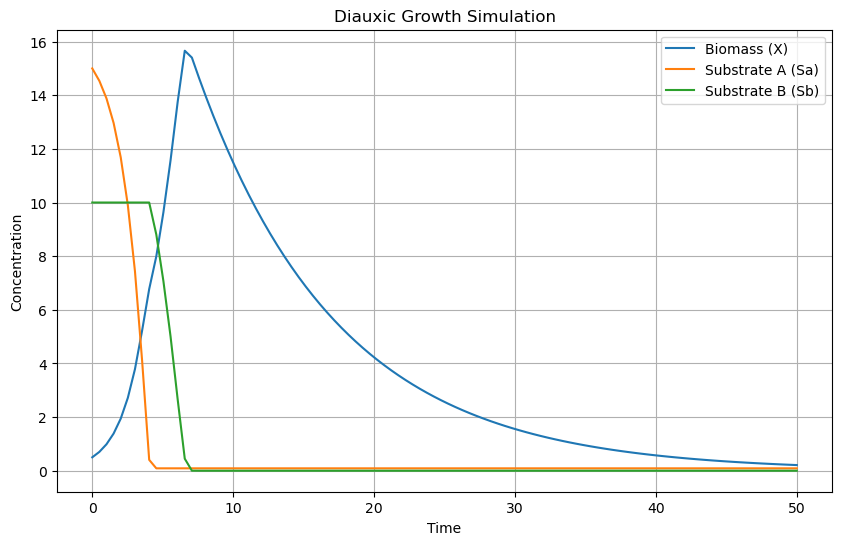

In [54]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='Biomass (X)')
plt.plot(t, Sa, label='Substrate A (Sa)')
plt.plot(t, Sb, label='Substrate B (Sb)')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Diauxic Growth Simulation')
plt.grid(True)
plt.show()